In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\EngAbdalhameed\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# imports

# Standard library imports
import os
from pathlib import Path
from collections import defaultdict

# Third-party imports
import pyreadstat
import numpy as np
from scipy.stats import skew
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go


In [3]:
# Check the contents of the 'Dataset' folder inside the extracted path
current_working_dir = os.getcwd()
dataset_folder = os.path.join(current_working_dir, "Dataset/XPT")
os.listdir(dataset_folder)


['AGP_L.xpt',
 'ALQ_L.xpt',
 'BAQ_L.xpt',
 'BAX_L.xpt',
 'BMX_L.xpt',
 'BPQ_L.xpt',
 'BPXO_L.xpt',
 'CBC_L.xpt',
 'DBQ_L.xpt',
 'DEMO_L.xpt',
 'DIQ_L.xpt',
 'DSQTOT_L.xpt',
 'ECQ_L.xpt',
 'FERTIN_L.xpt',
 'FOLATE_L.xpt',
 'FOLFMS_L.xpt',
 'GHB_L.xpt',
 'GLU_L.xpt',
 'HDL_L.xpt',
 'HSCRP_L.xpt',
 'HSQ_L.xpt',
 'IHGEM_L.xpt',
 'INS_L (1).xpt',
 'LUX_L.xpt',
 'OHQ_L.xpt',
 'PAQ_L.xpt',
 'PBCD_L.xpt',
 'RHQ_L.xpt',
 'RXQASA_L.xpt',
 'SLQ_L.xpt',
 'SMQ_L.xpt',
 'TCHOL_L.xpt',
 'VID_L.xpt',
 'WHQ_L.xpt']

In [4]:
column_sources = defaultdict(list)
merged_df = None
# Load all XPT files into dataframes (except OHQ_L.xpt which is for oral health)
dataframes = {}
for file in os.listdir(dataset_folder):
    if file.endswith('.xpt') :
        file_path = os.path.join(dataset_folder, file)
        df, meta = pyreadstat.read_xport(file_path, encoding='cp1252')
        key = Path(file).stem
        try:
            df, meta = pyreadstat.read_xport(file_path, encoding='cp1252')
            dataframes[key] = df
            print(f"✅ Loaded: {file}")
        except Exception as e:
            print(f"❌ Failed to load {file}: {e}")
        print(key)
        print(dataframes[key].shape)
        
        for var, label in zip(meta.column_names, meta.column_labels):
            print(f"{var}: {label}")
            #pass
        if merged_df is None:
            merged_df = df
        else:
            # Only keep columns that are not already in merged_df (except 'SEQN')
            df_filtered = df.loc[:, ~df.columns.isin(merged_df.columns.difference(['SEQN']))]
            merged_df = pd.merge(merged_df, df_filtered, on="SEQN", how="outer")
        for col in df.columns:
            column_sources[col].append(file)

# Find duplicates (i.e., columns that appear in more than one file)
duplicate_columns = {col: sources for col, sources in column_sources.items() if len(sources) > 1}

# Show them
for col, sources in duplicate_columns.items():
    print(f"🔁 Column '{col}' appears in: {sources}")
# Show the loaded dataset keys
#list(dataframes.keys())
merged_df.shape, merged_df.head()


✅ Loaded: AGP_L.xpt
AGP_L
(2564, 3)
SEQN: Respondent sequence number
WTPH2YR: Phlebotomy 2 Year Weight
LBXAGP: alpha-1-acid glycoprotein (g/L)
✅ Loaded: ALQ_L.xpt
ALQ_L
(6337, 9)
SEQN: Respondent sequence number
ALQ111: Ever had a drink of any kind of alcohol
ALQ121: Past 12 mos how often drink alc bev
ALQ130: Avg # alcoholic drinks/day/past 12 mos
ALQ142: # days have 4/5 drinks/past 12 mos
ALQ270: # times 4/5 drinks in 2hrs/past 12 mos
ALQ280: # times 8+ drinks in 1 day/past 12 mos
ALQ151: Ever have 4/5 or more drinks every day
ALQ170: # times 4/5 drinks on occasion/past mo
✅ Loaded: BAQ_L.xpt
BAQ_L
(6070, 15)
SEQN: Respondent sequence number
BAQ321A: Past 12 months, problems with vertigo
BAQ321B: Past 12 months, prblms w/blurring vision
BAQ321C: Past 12 months, problems with unsteady
BAQ321D: Past 12 months, problems w/light-headed
BAQ341: Past 12 months, which bothered the most?
BAQ391A: Episodes with nausea or vomiting?
BAQ391B: Episodes with migraine/severe headache?
BAQ401: Balan

((11933, 355),
        SEQN       WTPH2YR  LBXAGP  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  \
 0  130378.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 1  130379.0           NaN     NaN     1.0     2.0     3.0     0.0     NaN   
 2  130380.0  85328.844519   1.010     1.0    10.0     1.0     0.0     NaN   
 3  130381.0      0.000000     NaN     NaN     NaN     NaN     NaN     NaN   
 4  130382.0  59638.932323   0.921     NaN     NaN     NaN     NaN     NaN   
 
    ALQ280  ALQ151  ...  LBXVD2MS  LBDVD2LC  LBXVD3MS  LBDVD3LC  LBXVE3MS  \
 0     NaN     NaN  ...      1.57       1.0      57.3       0.0      2.47   
 1     NaN     2.0  ...      1.57       1.0      58.9       0.0      3.40   
 2     NaN     2.0  ...      1.57       1.0      37.8       0.0      1.52   
 3     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   
 4     NaN     NaN  ...       NaN       NaN       NaN       NaN       NaN   
 
    LBDVE3LC  WHD010  WHD020  WHD050  WHQ070  
 0  

In [5]:
merged_file_csv_path = os.path.join(current_working_dir, "DataSet/CSV/merged_output.csv")

if not os.path.exists(merged_file_csv_path):
    merged_df.to_csv(merged_file_csv_path, index=False)
    print(f"Merged Data saved to {merged_file_csv_path} ")




Merged Data saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\DataSet/CSV/merged_output.csv 


In [6]:
new_df = pd.read_csv(merged_file_csv_path)

In [7]:
display(new_df.info(),new_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Columns: 355 entries, SEQN to WHQ070
dtypes: float64(347), object(8)
memory usage: 32.3+ MB


None

,SEQN,WTPH2YR,LBXAGP,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ151,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
0,130378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.57,1.0,57.3,0.0,2.47,0.0,71.0,190.0,200.0,1.0
1,130379.0,NaN,NaN,1.0,2.0,3.0,0.0,NaN,NaN,2.0,...,1.57,1.0,58.9,0.0,3.40,0.0,70.0,220.0,220.0,2.0
2,130380.0,85328.844519,1.010,1.0,10.0,1.0,0.0,NaN,NaN,2.0,...,1.57,1.0,37.8,0.0,1.52,0.0,60.0,150.0,165.0,1.0
3,130381.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,59638.932323,0.921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SEQN,11933.0,136344.000000,3444.904716,130378.000,133361.000000,136344.000000,139327.000000,142310.000000
WTPH2YR,2564.0,38852.911512,35557.669012,0.000,15233.708494,32116.487072,54707.666378,253478.777645
LBXAGP,1950.0,0.775883,0.250911,0.261,0.588000,0.751500,0.922750,2.760000
ALQ111,5481.0,1.109104,0.385114,1.000,1.000000,1.000000,1.000000,9.000000
ALQ121,4922.0,5.030679,4.314321,0.000,2.000000,5.000000,8.000000,99.000000
...,...,...,...,...,...,...,...,...
LBDVE3LC,7238.0,0.009671,0.097872,0.000,0.000000,0.000000,0.000000,1.000000
WHD010,8486.0,150.146712,906.045672,40.000,63.000000,66.000000,70.000000,9999.000000
WHD020,8486.0,317.142588,1120.476550,63.000,145.000000,174.000000,207.000000,9999.000000
WHD050,8486.0,420.465237,1491.928102,67.000,145.000000,175.000000,214.000000,9999.000000


In [9]:
# Select rows with more than 50% missing values
threshold = new_df.shape[1] * 0.50
rows_with_many_nans = new_df[new_df.isnull().sum(axis=1) > threshold]

# Display the result
print(rows_with_many_nans)

           SEQN       WTPH2YR  LBXAGP  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  \
3      130381.0      0.000000     NaN     NaN     NaN     NaN     NaN     NaN   
4      130382.0  59638.932323   0.921     NaN     NaN     NaN     NaN     NaN   
5      130383.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6      130384.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7      130385.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...           ...     ...     ...     ...     ...     ...     ...   
11919  142297.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11926  142304.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11927  142305.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11928  142306.0           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11930  142308.0           NaN     NaN     1.0     8.0     2.0     0.0     NaN   

       ALQ280  ALQ151  ... 

In [10]:
# keep lessthan or equal 50% missing rows
new_df = new_df[new_df.isnull().sum(axis=1) <= threshold]

# (Optional) Reset the index
new_df.reset_index(drop=True, inplace=True)

In [11]:
display(new_df.info(),new_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Columns: 355 entries, SEQN to WHQ070
dtypes: float64(347), object(8)
memory usage: 14.5+ MB


None

,SEQN,WTPH2YR,LBXAGP,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ151,...,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC,WHD010,WHD020,WHD050,WHQ070
0,130378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.57,1.0,57.3,0.0,2.47,0.0,71.0,190.0,200.0,1.0
1,130379.0,NaN,NaN,1.0,2.0,3.0,0.0,NaN,NaN,2.0,...,1.57,1.0,58.9,0.0,3.40,0.0,70.0,220.0,220.0,2.0
2,130380.0,85328.844519,1.01,1.0,10.0,1.0,0.0,NaN,NaN,2.0,...,1.57,1.0,37.8,0.0,1.52,0.0,60.0,150.0,165.0,1.0
3,130386.0,NaN,NaN,1.0,4.0,2.0,10.0,0.0,10.0,2.0,...,1.57,1.0,95.3,0.0,5.53,0.0,68.0,200.0,180.0,2.0
4,130387.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2.0,...,1.57,1.0,25.1,0.0,1.10,0.0,67.0,215.0,215.0,2.0


In [12]:
# Detect Null Values [columns]
print(new_df.isnull().sum().to_string())


SEQN           0
WTPH2YR     4094
LBXAGP      4115
ALQ111       523
ALQ121       923
ALQ130      1641
ALQ142      1631
ALQ270      3183
ALQ280      3186
ALQ151       942
ALQ170      3189
BAQ321A     1008
BAQ321B     1008
BAQ321C     1009
BAQ321D     1009
BAQ341      3726
BAQ391A     3733
BAQ391B     3733
BAQ401      3726
BAQ421      3726
BAQ431      3726
BAQ491      3726
BAQ530      1008
BAQ550      3252
BAQ560      4063
BAXMSTAT    1007
BAXRXNC     5180
BAXRXND     5262
BAX5STAT    1107
BAQ110      1251
BAQ121      1297
BAQ125      1320
BAQ132      1547
BAQ140      1547
BAQ150      1598
BAQ160      1931
BAQ170      2026
BAQ201      2245
BAQ173      1602
BAXPF11     1618
BAXTC11     1619
BAARFC11    5321
BAXPF12     5321
BAXTC12     5321
BAARFC12    5364
BAXPF21     1625
BAXTC21     1626
BAARFC21    5278
BAXPF22     5275
BAXTC22     5278
BAARFC22    5345
BAXPF31     1668
BAXTC31     1682
BAARFC31    5293
BAXPF32     5293
BAXTC32     5294
BAARFC32    5350
BAXPF41     1699
BAXTC41     17

In [13]:
missing_over_30Percent = new_df.isnull().mean() > 0.3
columns_with_missing_over_30 = new_df.columns[missing_over_30Percent]

# To see the counts of missing values in those columns:
missing_counts = new_df[columns_with_missing_over_30].isnull().sum()
pd.set_option('display.max_rows', None)
print(missing_counts)


WTPH2YR     4094
LBXAGP      4115
ALQ130      1641
ALQ142      1631
ALQ270      3183
ALQ280      3186
ALQ170      3189
BAQ341      3726
BAQ391A     3733
BAQ391B     3733
BAQ401      3726
BAQ421      3726
BAQ431      3726
BAQ491      3726
BAQ550      3252
BAQ560      4063
BAXRXNC     5180
BAXRXND     5262
BAQ160      1931
BAQ170      2026
BAQ201      2245
BAXPF11     1618
BAXTC11     1619
BAARFC11    5321
BAXPF12     5321
BAXTC12     5321
BAARFC12    5364
BAXPF21     1625
BAXTC21     1626
BAARFC21    5278
BAXPF22     5275
BAXTC22     5278
BAARFC22    5345
BAXPF31     1668
BAXTC31     1682
BAARFC31    5293
BAXPF32     5293
BAXTC32     5294
BAARFC32    5350
BAXPF41     1699
BAXTC41     1710
BAARFC41    4042
BAXPF42     4045
BAXTC42     4108
BAARFC42    4701
BAXPF51     2856
BAXTC51     2894
BAARFC51    4140
BAXPF52     4176
BAXTC52     4199
BAARFC52    4611
BMIWT       5222
BMXRECUM    5369
BMIRECUM    5369
BMXHEAD     5369
BMIHEAD     5369
BMIHT       5301
BMDBMIC     5252
BMILEG      51

In [14]:
# Drop those columns
columns_to_drop = [col for col in columns_with_missing_over_30 if col in new_df.columns]
new_df.drop(columns=columns_to_drop, inplace=True)

# (Optional) Reset the index if needed
new_df.reset_index(drop=True, inplace=True)

| Aspect  | Threshold | Action                             |
|---------|-----------|------------------------------------|
| Rows    | 50%       | Keep only rows with ≤50% columns missing   |
| Columns | 30%       | Remove columns with >30% missing     |


In [15]:
# Save the updated DataFrame to a CSV file
cleaned_data_AfterDropping_50_Rows_30_Cols_path = os.path.join(current_working_dir, "DataSet/CSV/cleaned_data_AfterDropping_50_Rows_30_Cols.csv")

if not os.path.exists(cleaned_data_AfterDropping_50_Rows_30_Cols_path):
    new_df.to_csv(cleaned_data_AfterDropping_50_Rows_30_Cols_path, index=False)

print(f"Data has been saved to {cleaned_data_AfterDropping_50_Rows_30_Cols_path}.")


Data has been saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\DataSet/CSV/cleaned_data_AfterDropping_50_Rows_30_Cols.csv.


In [16]:
dff = pd.read_csv(cleaned_data_AfterDropping_50_Rows_30_Cols_path)

In [17]:
dff.head

<bound method NDFrame.head of           SEQN  ALQ111  ALQ121  ALQ151  BAQ321A  BAQ321B  BAQ321C  BAQ321D  \
0     130378.0     NaN     NaN     NaN      2.0      2.0      2.0      2.0   
1     130379.0     1.0     2.0     2.0      2.0      2.0      2.0      2.0   
2     130380.0     1.0    10.0     2.0      1.0      1.0      1.0      1.0   
3     130386.0     1.0     4.0     2.0      2.0      2.0      2.0      2.0   
4     130387.0     1.0     0.0     2.0      2.0      2.0      2.0      2.0   
5     130389.0     1.0     2.0     2.0      1.0      2.0      2.0      1.0   
6     130390.0     NaN     NaN     NaN      2.0      2.0      2.0      2.0   
7     130391.0     2.0     NaN     NaN      2.0      2.0      2.0      2.0   
8     130392.0     1.0     8.0     2.0      NaN      NaN      NaN      NaN   
9     130393.0     1.0     3.0     2.0      2.0      2.0      1.0      2.0   
10    130394.0     1.0     6.0     2.0      2.0      2.0      2.0      2.0   
11    130395.0     1.0    10.0    

In [18]:
metadata_after_dropping_cols_intution_file_path = os.path.join(current_working_dir, "DataSet/Excel/MetaData_AfterDroppingCols_by_intution.xlsx")
metadata_df = pd.read_excel(metadata_after_dropping_cols_intution_file_path)
filtered_cols = [col for col in metadata_df['ColumnName']]

filtered_dff = dff[filtered_cols]
print(filtered_dff.shape)

(5369, 84)


In [19]:
cleaned_data_afterDropping_cols_by_intution_file_path = os.path.join(current_working_dir, "DataSet/CSV/cleaned_data_AfterDroppingCols_by_intution.csv")
if not os.path.exists(cleaned_data_afterDropping_cols_by_intution_file_path):
    filtered_dff.to_csv(cleaned_data_afterDropping_cols_by_intution_file_path, index=False)
    print(f"Data has been saved to {cleaned_data_afterDropping_cols_by_intution_file_path}.")



Data has been saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\DataSet/CSV/cleaned_data_AfterDroppingCols_by_intution.csv.


## What is Imputation?

**Imputation** is the process of filling in **missing** or **NaN (Not a Number)** values in a dataset with estimated values. 

---

### Why Impute?

- **Avoid Losing Data**: Removing rows or columns with missing values can result in a significant loss of data, especially if the missingness is widespread.
- **Maintain Consistency**: Imputation helps preserve the structure and size of the dataset, which is important for analysis and modeling.
- **Improve Model Accuracy**: Machine learning models and statistical analyses often require complete data, and imputing missing values can help improve model performance.

---

### Common Imputation Strategies:

1. **Mean Imputation** (for numerical data):
   - Replace missing values with the **mean** (average) value of the column.
   - Best suited for symmetric datasets without many outliers.

2. **Median Imputation** (for numerical data):
   - Replace missing values with the **median** value of the column.
   - Preferred when the data contains outliers since the median is more robust to extreme values.

3. **Mode Imputation** (for categorical data):
   - Replace missing values with the **mode** (most frequent value) of the column.
   - This is common for categorical variables where the most frequent category is a reasonable estimate for missing data.

4. **Forward Fill / Backward Fill**:
   - **Forward Fill**: Propagate the previous value to fill the missing data.
   - **Backward Fill**: Propagate the next value to fill the missing data.
   - These methods are typically used in time-series data.


In [20]:
count_categorial = 0
for col in filtered_dff.columns:
    if filtered_dff[col].dtype == "boolean" or filtered_dff[col].dtype == "category" :
        count_categorial +=1
print(filtered_dff.shape, count_categorial)

(5369, 84) 0


In [21]:
preprocessing_df = filtered_dff.copy()

# Data Type & Preprocessing Guide for Variables


In [22]:
def print_unique_type_valuecount(df, column_name):
    # Check if df is defined and is a DataFrame
    if df is None or not isinstance(df, pd.DataFrame):
        print("Error: The provided object is not a valid DataFrame.")
        return

    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Proceed with printing info
    print("Unique values:")
    print(df[column_name].unique())

    print("\nData type:")
    print(df[column_name].dtype)

    print("\nFrequency of unique values:")
    print(df[column_name].value_counts(dropna=False))


## Alcohol Use (ALQ) Data Processing Guide
## Variable: ALQ121 - "How often drank alcoholic beverages in past 12 months?"

### Data Source
[NHANES 2021 ALQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/ALQ_L.htm)

---

## Variable Overview
### Coding Scheme
| Code | Description                     | Analysis Recommendation          |
|------|---------------------------------|----------------------------------|
| 0    | Never in the last year          | Baseline reference (0 frequency) |
| 1    | Every day                       | Highest frequency category       |
| 2    | Nearly every day                |                                  |
| 3    | 3 to 4 times a week             |                                  |
| 4    | 2 times a week                  |                                  |
| 5    | Once a week                     |                                  |
| 6    | 2 to 3 times a month            |                                  |
| 7    | Once a month                    |                                  |
| 8    | 7 to 11 times in the last year  |                                  |
| 9    | 3 to 6 times in the last year   |                                  |
| 10   | 1 to 2 times in the last year   | Lowest non-zero frequency        |
| 77   | Refused                         | Convert to NaN                   |
| 99   | Don't know                      | Convert to NaN                   |
| .    | Missing                         | Convert to NaN                   |               

### Recommended Data Type
- **Primary Type**: `pandas.Categorical` (ordered)

In [23]:
# Replace all special codes with NaN 
preprocessing_df['ALQ121'] = preprocessing_df['ALQ121'].replace([77, 99, '.'], np.nan)

# frequency order
alq121_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]   # Ordered from most to least frequent

# Set as ordered categorical
cat_type = pd.CategoricalDtype(categories=alq121_order, ordered=True)
preprocessing_df['ALQ121'] = preprocessing_df['ALQ121'].astype(cat_type)

print_unique_type_valuecount(preprocessing_df, 'ALQ121')



Unique values:
[NaN, 2, 10, 4, 0, ..., 6, 5, 9, 1, 7]
Length: 12
Categories (11, int64): [1 < 2 < 3 < 4 ... 8 < 9 < 10 < 0]

Data type:
category

Frequency of unique values:
ALQ121
NaN    926
0      704
6      532
10     486
9      457
4      453
3      429
5      393
7      318
2      275
8      244
1      152
Name: count, dtype: int64


## Alcohol Use (ALQ) Data Processing Guide
## Variable: ALQ151 - "Ever have 4/5 or more drinks every day?"

### Data Source
[NHANES 2021 ALQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/ALQ_L.htm)

---

## Variable Overview
### Coding Scheme
| Code | Description                     | 
|------|---------------------------------|
| 1    | YES          | 
| 2    | NO                     | 
| 7   | Refused                         |
| 9   | Don't know                      |
| .    | Missing                         |              

### Recommended Data Type
- **Primary Type**: `pandas.Boolean`

In [24]:
# Replace all special codes with NaN 
preprocessing_df['ALQ151'] = preprocessing_df['ALQ151'].replace([7, 9, '.'], np.nan)

# Change type to category
preprocessing_df['ALQ151'] = preprocessing_df['ALQ151'].replace({1: 1, 2: 0}).astype('boolean')

print_unique_type_valuecount(preprocessing_df, 'ALQ151')

Unique values:
<BooleanArray>
[<NA>, False, True]
Length: 3, dtype: boolean

Data type:
boolean

Frequency of unique values:
ALQ151
False    3604
<NA>      945
True      820
Name: count, dtype: Int64


## Balance (BAQ) Data Processing Guide


## Variables: 
- BAQ321A - "Past 12 months, problems with vertigo?"
- BAQ321B - "Past 12 months, problems w/blurring vision?"
- BAQ321C - "Past 12 months, problems with unsteady?"
- BAQ321D - "Past 12 months, problems w/light-headed?"

### Data Source
[NHANES 2021 BAQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BAQ_L.htm)

---

## Variable Overview
### Coding Scheme
- All 4 variables have same coding

| Code | Description                     | 
|------|---------------------------------|
| 1    | YES          | 
| 2    | NO                     | 
| 7   | Refused                         |
| 9   | Don't know                      |
| .    | Missing                         |              

### Recommended Data Type
- **Primary Type**: `pandas.Boolean`

In [25]:
preprocessing_df['BAQ321A'] = preprocessing_df['BAQ321A'].replace([7, 9, '.'], np.nan)
preprocessing_df['BAQ321B'] = preprocessing_df['BAQ321B'].replace([7, 9, '.'], np.nan)
preprocessing_df['BAQ321C'] = preprocessing_df['BAQ321C'].replace([7, 9, '.'], np.nan)
preprocessing_df['BAQ321D'] = preprocessing_df['BAQ321D'].replace([7, 9, '.'], np.nan)

preprocessing_df['BAQ321A'] = preprocessing_df['BAQ321A'].replace({1: 1, 2: 0}).astype('boolean')
preprocessing_df['BAQ321B'] = preprocessing_df['BAQ321B'].replace({1: 1, 2: 0}).astype('boolean')
preprocessing_df['BAQ321C'] = preprocessing_df['BAQ321C'].replace({1: 1, 2: 0}).astype('boolean')
preprocessing_df['BAQ321D'] = preprocessing_df['BAQ321D'].replace({1: 1, 2: 0}).astype('boolean')


## Variables: 
- BAQ110 - "Can stand on your own?"
- BAQ132 - "Problems with dizzy, past 24 hours?"
- BAQ140 - "Last 12 months, fallen due to dizziness?"


### Data Source
[NHANES 2021 BAQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BAX_L.htm)

---

## Variable Overview
### Coding Scheme
- All 3 variables have same coding

| Code | Description                     | 
|------|---------------------------------|
| 1    | YES          | 
| 2    | NO                     | 
| 7   | Refused                         |
| 9   | Don't know                      |
| .    | Missing                         |              

### Recommended Data Type
- **Primary Type**: `pandas.Boolean`

In [26]:
preprocessing_df['BAQ110'] = preprocessing_df['BAQ110'].replace([7, 9, '.'], np.nan)
preprocessing_df['BAQ132'] = preprocessing_df['BAQ132'].replace([7, 9, '.'], np.nan)
preprocessing_df['BAQ140'] = preprocessing_df['BAQ140'].replace([7, 9, '.'], np.nan)

preprocessing_df['BAQ110'] = preprocessing_df['BAQ110'].replace({1: 1, 2: 0}).astype('boolean')
preprocessing_df['BAQ132'] = preprocessing_df['BAQ132'].replace({1: 1, 2: 0}).astype('boolean')
preprocessing_df['BAQ140'] = preprocessing_df['BAQ140'].replace({1: 1, 2: 0}).astype('boolean')

## Variable: BAQ530 - " Past 5 years, how many times fallen??"

### Data Source
[NHANES 2021 BAQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BAQ_L.htm)

---

## Variable Overview
### Coding Scheme
| Code | Description                     | Analysis Recommendation          |
|------|---------------------------------|----------------------------------|
| 1    | Never         | Baseline reference (0 frequency) |
| 2    | 1 or 2 times                      |        |
| 3    | 3 to 4 times                |                                  |
| 4    | About every year             |                                  |
| 5    | About every month                 |                                  |
| 6    | About every week                     |                                  |
| 7    | Daily or constantly            |                                  |
| 77   | Refused                         | Convert to NaN                   |
| 99   | Don't know                      | Convert to NaN                   |
| .    | Missing                         | Convert to NaN                   |               

### Recommended Data Type
- **Primary Type**: `pandas.Categorical` (ordered)

In [27]:
preprocessing_df['BAQ530'] = preprocessing_df['BAQ530'].replace([77, 99, '.'], np.nan)
preprocessing_df['BAQ530'] = preprocessing_df['BAQ530'].astype('category')
preprocessing_df['BAQ530'] = preprocessing_df['BAQ530'].cat.as_ordered()

print_unique_type_valuecount(preprocessing_df, 'BAQ530')

Unique values:
[1.0, 3.0, 2.0, NaN, 5.0, 4.0, 7.0, 6.0]
Categories (7, float64): [1.0 < 2.0 < 3.0 < 4.0 < 5.0 < 6.0 < 7.0]

Data type:
category

Frequency of unique values:
BAQ530
 1.0    2222
 2.0    1239
NaN     1030
 3.0     449
 4.0     266
 5.0     114
 6.0      30
 7.0      19
Name: count, dtype: int64


# Blood Pressure & Cholesterol (BPQ) Data Processing Guide


## Variables: 
- BPQ020 - "Ever told you had high blood pressure?"
- BPQ080 - "Doctor told you - high cholesterol level?"
- BPQ101D - "Taking meds to lower blood cholesterol??"

### Data Source
[NHANES 2021 BPQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPQ_L.htm)

---

## Variable Overview
### Coding Scheme
- All 3 variables have same coding

| Code | Description                     | 
|------|---------------------------------|
| 1    | YES          | 
| 2    | NO                     | 
| 7   | Refused                         |
| 9   | Don't know                      |
| .    | Missing                         |              

### Recommended Data Type
- **Primary Type**: `pandas.Boolean`

In [28]:
preprocessing_df['BPQ020'] = preprocessing_df['BPQ020'].replace([7, 9, '.'], np.nan)
preprocessing_df['BPQ080'] = preprocessing_df['BPQ080'].replace([7, 9, '.'], np.nan)
preprocessing_df['BPQ101D'] = preprocessing_df['BPQ101D'].replace([7, 9, '.'], np.nan)

preprocessing_df['BPQ020'] = preprocessing_df['BPQ020'].replace({1: 1, 2: 0}).astype('boolean')
preprocessing_df['BPQ080'] = preprocessing_df['BPQ080'].replace({1: 1, 2: 0}).astype('boolean')
preprocessing_df['BPQ101D'] = preprocessing_df['BPQ101D'].replace({1: 1, 2: 0}).astype('boolean')

### Variables 
- BPXOSY1 - "Systolic - 1st oscillometric reading"
- BPXODI1 - "Diastolic - 1st oscillometric reading"
- BPXOSY2 - "Systolic - 2nd oscillometric reading"
- BPXODI2 - "Diastolic - 2nd oscillometric reading"
- BPXOSY3 - "Systolic - 3rd oscillometric reading"
- BPXODI3 - "Diastolic - 3rd oscillometric reading"
- BPXOPLS1 - "Pulse - 1st oscillometric reading"
- BPXOPLS2 - "Pulse - 2nd oscillometric reading"
- BPXOPLS3 - "Pulse - 3rd oscillometric reading"


In [29]:
# Take average of 3 readings and store in new column
original_columns = [
    "BPXOSY1", "BPXOSY2", "BPXOSY3",
    "BPXODI1", "BPXODI2", "BPXODI3",
    "BPXOPLS1", "BPXOPLS2", "BPXOPLS3"
]

# Calculate averages only for columns that exist
existing_bp_cols = [col for col in original_columns if col in df.columns]

# Systolic
sbp_cols = [col for col in existing_bp_cols if 'OSY' in col]
if sbp_cols:
    preprocessing_df["BPXOSY_AVG"] = preprocessing_df[sbp_cols].mean(axis=1)

# Diastolic
dbp_cols = [col for col in existing_bp_cols if 'ODI' in col]
if dbp_cols:
    preprocessing_df["BPXODI_AVG"] = preprocessing_df[dbp_cols].mean(axis=1)

# Pulse
pulse_cols = [col for col in existing_bp_cols if 'PLS' in col]
if pulse_cols:
    preprocessing_df["BPXOPLS_AVG"] = preprocessing_df[pulse_cols].mean(axis=1)

# drop original columns (only those that exist)
cols_to_drop = [col for col in original_columns if col in df.columns]
if cols_to_drop:
    preprocessing_df.drop(columns=cols_to_drop, inplace=True)
else:
    print("No original blood pressure columns found to drop")


No original blood pressure columns found to drop


# Gender & Race Data Processing Guide

### Data Source
[NHANES 2021 BAQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/demo_L.htm)

### Variables
### RIAGENDR - "Gender"
### Recommended Data Type
**Primary Type**: `pandas.Category`

| Code | Value Description |
|------|-------------------|
| 1    | Male              |
| 2    | Female            |
| .    | Missing           |


### RIDRETH3 - "Race/Hispanic origin w/ NH Asian"
### Recommended Data Type
**Primary Type**: `pandas.Category`

| Code | Value Description                    |
|------|--------------------------------------|
| 1    | Mexican American                     |
| 2    | Other Hispanic                       |
| 3    | Non-Hispanic White                   |
| 4    | Non-Hispanic Black                   |
| 6    | Non-Hispanic Asian                   |
| 7    | Other Race - Including Multi-Racial  |
| .    | Missing                              |


### DMDBORN4 - "Country of birth"
### Recommended Data Type
**Primary Type**: `pandas.Boolean`

| Code | Value Description                                |
|------|--------------------------------------------------|
| 1    | Born in 50 US states or Washington               |
| 2    | Others                                           |
| 77   | Refused                                          |
| 99   | Don't know                                       |
| .    | Missing                                          |



In [30]:
preprocessing_df['RIAGENDR'] = preprocessing_df['RIAGENDR'].replace('.', np.nan).astype("category")
preprocessing_df['RIDRETH3'] = preprocessing_df['RIDRETH3'].replace('.', np.nan).astype('category')

preprocessing_df['DMDBORN4'] = preprocessing_df['DMDBORN4'].replace([77, 99, '.'], np.nan)
preprocessing_df['DMDBORN4'] = preprocessing_df['DMDBORN4'].replace({1: 1, 2: 0}).astype('boolean')                   


#  HIV virus and Teeth Data Preprocessing Guide

### Data Source
[NHANES 2021 HSQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/hsq_L.htm)
[NHANES 2021 OHQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/ohq_L.htm)

### Variables
### HSQ590 - "Blood ever tested for HIV virus?"
### Recommended Data Type
**Primary Type**: `pandas.Boolean`

| Code | Value Description |
|------|-------------------|
| 1    | Yes               |
| 2    | No                |
| 7    | Refused           |
| 9    | Don't know        |
| .    | Missing           |


	 
### OHQ845 - "Rate the health of your teeth and gums"
### Recommended Data Type
**Primary Type**: `pandas.Category`

| Code | Value Description |
|------|-------------------|
| 1    | Excellent         |
| 2    | Very good         |
| 3    | Good              |
| 4    | Fair              |
| 5    | Poor              |
| 7    | Refused           |
| 9    | Don't know        |
| .    | Missing           |


### OHQ620 - "How often last yr. had aching in mouth?"
### Recommended Data Type
**Primary Type**: `pandas.Category`

| Code | Value Description |
|------|-------------------|
| 1    | Very often        |
| 2    | Fairly often      |
| 3    | Occasionally      |
| 4    | Hardly ever       |
| 5    | Never             |
| 7    | Refused           |
| 9    | Don't know        |
| .    | Missing           |



In [31]:
preprocessing_df['HSQ590'] = preprocessing_df['HSQ590'].replace([7, 9, '.'], np.nan)
preprocessing_df['HSQ590'] = preprocessing_df['HSQ590'].replace({1: 1, 2: 0}).astype("boolean")

preprocessing_df['OHQ845'] = preprocessing_df['OHQ845'].replace([7, 9, '.'], np.nan).astype('category')
preprocessing_df['OHQ845'] = preprocessing_df['OHQ845'].cat.as_ordered()

preprocessing_df['OHQ620'] = preprocessing_df['OHQ620'].replace([7, 9, '.'], np.nan).astype('category')
preprocessing_df['OHQ620'] = preprocessing_df['OHQ620'].cat.as_ordered()


# Smoking Data Preprocessing Guide

### Data Source
[NHANES 2021 SMQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/smq_L.htm)
	 
### SMQ020 - "Smoked at least 100 cigarettes in life"
### Recommended Data Type
**Primary Type**: `pandas.Boolean`

| Code | Value Description |
|------|-------------------|
| 1    | Yes               |
| 2    | No                |
| 7    | Refused           |
| 9    | Don't know        |
| .    | Missing           |



In [32]:
preprocessing_df['SMQ020'] = preprocessing_df['SMQ020'].replace([7, 9, '.'], np.nan)  
preprocessing_df['SMQ020'] = preprocessing_df['SMQ020'].replace({1: 1, 2: 0}).astype('boolean')  

# Target Variables Data Preprocessing Guide

### Data Source
[NHANES 2021 DIQ Data Documentation](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/diq_L.htm)

### Variables
- DIQ010 - "Doctor told you have diabetes?"

## Variable Overview
### Coding Scheme

| Code | Value Description |
|------|-------------------|
| 1    | Yes               |
| 2    | No                |
| 3    | Borderline        |
| 7    | Refused           |
| 9    | Don't know        |
| .    | Missing           |

### Recommended Data Type
- **Primary Type**: `pandas.boolean`


In [33]:
# Prediabetes
preprocessing_df['DIQ160'] = preprocessing_df['DIQ160'].replace([3,7,9,'.'], np.nan)
preprocessing_df['DIQ160'] = preprocessing_df['DIQ160'].replace({1: True, 2: False}).astype("boolean")

In [34]:
preprocessing_df['DIQ010'] = preprocessing_df['DIQ010'].replace([3,7,9,'.'], np.nan)
preprocessing_df['DIQ010'] = preprocessing_df['DIQ010'].replace({1: 1, 2: 0}).astype("boolean")

In [35]:
count_categorial = 0
numerical_categorial = 0
for col in preprocessing_df.columns:
    if preprocessing_df[col].dtype == "boolean" or preprocessing_df[col].dtype == "category" :
        count_categorial +=1
    else:
        numerical_categorial += 1
print(preprocessing_df.shape, count_categorial, numerical_categorial)

(5369, 84) 22 62


In [36]:
numerical_skewed_cols = []
numerical_symmetric_cols = []

imputation_df = preprocessing_df.copy()
for col in imputation_df.columns:
    if imputation_df[col].dtype in ["category", "boolean"] :
        imputation_df[col] = imputation_df[col].fillna(imputation_df[col].mode(dropna=True)[0])  # Categorical: mode
    else:
        # Numerical:
        skewness = skew(imputation_df[col].dropna())
        if abs(skewness) > 1:
            # Highly skewed → median
            imputation_df[col] = imputation_df[col].fillna(imputation_df[col].median())
            numerical_skewed_cols.append(col)
        else:
            # Symmetric → mean
            imputation_df[col] = imputation_df[col].fillna(imputation_df[col].mean())
            numerical_symmetric_cols.append(col)

print("numerical symmetric cols: ", numerical_symmetric_cols)
print("numerical skewed cols: ", numerical_skewed_cols)
# Save cleaned data
impute_data_csv_path = os.path.join(current_working_dir, "DataSet/CSV/cleaned_data_AfterImputation.csv")
impute_data_excel_path = os.path.join(current_working_dir, "DataSet/Excel/cleaned_data_AfterImputation.xlsx")

if not os.path.exists(impute_data_csv_path):
    imputation_df.to_csv(impute_data_csv_path, index=False)
    print(f"Data after imputation has been saved to {impute_data_csv_path}.")

if not os.path.exists(impute_data_excel_path):
    imputation_df.to_excel(impute_data_excel_path, index=False)
    print(f"Data after imputation has been saved to {impute_data_excel_path}.")

numerical symmetric cols:  ['SEQN', 'BMXHT', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'BPXOSY1', 'BPXODI1', 'BPXOSY2', 'BPXODI2', 'BPXOSY3', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3', 'LBXRBCSI', 'LBXHGB', 'LBXMCVSI', 'LBXPLTSI', 'LBXMPSI', 'RIDAGEYR', 'LUXCAPM', 'SLD012', 'SLD013', 'LBDTCSI']
numerical skewed cols:  ['BMXWT', 'BMXBMI', 'BMXHIP', 'LBXWBCSI', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBXRDW', 'WTDRD1', 'DSDCOUNT', 'DSDANCNT', 'LBDRFOSI', 'LBDFOTSI', 'LBXSF1SI', 'LBXSF2SI', 'LBXSF3SI', 'LBXSF4SI', 'LBXSF5SI', 'LBXSF6SI', 'LBXGH', 'LBDHDDSI', 'LBXHSCRP', 'LBDIHGSI', 'LBDBGESI', 'LBDBGMSI', 'LUAXSTAT', 'LUXSMED', 'LUXSIQR', 'LUXCPIQR', 'LBDBPBSI', 'LBDBCDSI', 'LBDTHGSI', 'LBDBSESI', 'LBDBMNSI', 'LBXVD2MS', 'LBXVD3MS', 'LBXVE3MS']
Data after imputation has been saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\DataSet/CSV/cleaned_data_AfterImputation.csv.
Data after imputation has been saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\Dat

In [37]:
# check imputation worked correctly
# sum for each column for null values should result in 0
imputation_df.isnull().sum()

SEQN        0
ALQ121      0
ALQ151      0
BAQ321A     0
BAQ321B     0
BAQ321C     0
BAQ321D     0
BAQ530      0
BAQ110      0
BAQ132      0
BAQ140      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
BMXHIP      0
BPQ020      0
BPQ080      0
BPQ101D     0
BPXOSY1     0
BPXODI1     0
BPXOSY2     0
BPXODI2     0
BPXOSY3     0
BPXODI3     0
BPXOPLS1    0
BPXOPLS2    0
BPXOPLS3    0
LBXWBCSI    0
LBDLYMNO    0
LBDMONO     0
LBDNENO     0
LBXRBCSI    0
LBXHGB      0
LBXMCVSI    0
LBXRDW      0
LBXPLTSI    0
LBXMPSI     0
RIAGENDR    0
RIDAGEYR    0
RIDRETH3    0
DMDBORN4    0
DIQ010      0
DIQ160      0
WTDRD1      0
DSDCOUNT    0
DSDANCNT    0
LBDRFOSI    0
LBDFOTSI    0
LBXSF1SI    0
LBXSF2SI    0
LBXSF3SI    0
LBXSF4SI    0
LBXSF5SI    0
LBXSF6SI    0
LBXGH       0
LBDHDDSI    0
LBXHSCRP    0
HSQ590      0
LBDIHGSI    0
LBDBGESI    0
LBDBGMSI    0
LUAXSTAT    0
LUXSMED     0
LUXSIQR     0
LUXCAPM     0
LUXCPIQR    0
OHQ845      0
OHQ620

# Feature Selection

In [38]:
print(imputation_df.dtypes.unique())

[dtype('float64')
 CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0], ordered=True, categories_dtype=int64)
 BooleanDtype
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ordered=True, categories_dtype=float64)
 CategoricalDtype(categories=[1.0, 2.0], ordered=False, categories_dtype=float64)
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 6.0, 7.0], ordered=False, categories_dtype=float64)
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=True, categories_dtype=float64)]


## Based on the types we will need to use these correlation methods
- Numerical (float64) vs. Boolean (DIQ010): Point-Biserial Correlation
- Boolean vs. Boolean: Phi Coefficient
- Categorical (ordered) vs. Boolean: Spearman Correlation
- Categorical (unordered) vs. Boolean: Cramér’s V

In [39]:
from scipy.stats import pointbiserialr , pearsonr, spearmanr, chi2_contingency

## Point-Biserial Correlation
- A method which calculates the correlation between a continuous variable (e.g. weight) and a Binary Variable (e.g. male,female)

### Point-Biserial Correlation Formula

The Point-Biserial correlation coefficient between a continuous variable \(X\) and a binary variable \(Y\) is computed using the following formula:

$$
cor_{pb} = \frac{M_1 - M_0}{s_X} \sqrt{\frac{n_1 n_0}{n(n-1)}}
$$

Where:
- \(M_1\) = Mean of \(X\) when \(Y=1\)
- \(M_0\) = Mean of \(X\) when \(Y=0\)
- \(s_X\) = Standard deviation of \(X\) (all values)
- \(n_1\) = Number of cases where \(Y=1\)
- \(n_0\) = Number of cases where \(Y=0\)
- \(n\) = Total sample size (\(n = n_1 + n_0\))


In [40]:
def point_byserial_correlation_manual(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    
    if len(np.unique(y)) != 2:
        raise ValueError("Target Variable must contain exactly two distinct values")
                         
    M1 = np.mean(x[y == 1])
    M0 = np.mean(x[y == 0])
    sx = np.std(x, ddof=1)

    n = len(y)
    n1 = np.sum(y == 1)
    n0 = n - n1
    
    cor_pb = ((M1 - M0) / sx) * np.sqrt((n1 * n0) / (n ** 2))
    return cor_pb

## Phi Coefficient
- A method which calculates the correlation between two Binary Variables 



### Formula for Phi Coefficient

The Phi Coefficient for two binary variables \( X \) and \( Y \) is computed using the following formula:

$$
phi = \frac{(ad - bc)}{\sqrt{(a+b)(c+d)(a+c)(b+d)}}
$$


Where:
- \( a \) = Number of observations where both \( X = 1 \) and \( Y = 1 \)
- \( b \) = Number of observations where \( X = 1 \) and \( Y = 0 \)
- \( c \) = Number of observations where \( X = 0 \) and \( Y = 1 \)
- \( d \) = Number of observations where both \( X = 0 \) and \( Y = 0 \)


In [41]:
def phi_coefficient_manual(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    
    if len(np.unique(y)) != 2:
        raise ValueError("Target Variable must contain exactly two distinct values")
                         
    a = np.sum((x == 1) & (y == 1))
    b = np.sum((x == 1) & (y == 0))
    c = np.sum((x == 0) & (y == 1))
    d = np.sum((x == 0) & (y == 0))
    
    cor_phi = (a * d - b * c) / np.sqrt( (a+b) * (c+d) * (a+c) * (b+d) )
    return cor_phi

# Spearman's Rank Correlation and Cramér's V

## 1. Spearman's Rank Correlation

**Spearman's Rank Correlation**  is a non-parametric measure of the correlation between two ranked variables. It evaluates the degree to which the variables' ranks are related.

### Formula for Spearman's Rank Correlation
Spearman’s rank correlation coefficient is calculated as:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

Where:
- \( d_i \) = Difference between the ranks of corresponding values in the two variables
- \( n \) = Number of paired ranks

### Steps for Calculation:
1. Rank the data points in each variable.
2. Calculate the difference \( d_i \) between the ranks of corresponding data points.
3. Square the differences and sum them up.
4. Use the formula to calculate the correlation coefficient.

- It is a **non-parametric** test, meaning it does not assume the data follows a specific distribution.
- Useful for ordinal variables or continuous variables that are not normally distributed.






# Cramér's V

**Cramér's V** is a statistical measure used to assess the correlation between two categorical variables. It is derived from the Chi-squared statistic and is used to quantify the association between nominal (categorical) variables.

Cramér's V is calculated using the following formula:

$$
V = \sqrt{\frac{\chi^2}{n \times (k - 1)}}
$$

Where:
- \( ${\chi^2}$ \) = Chi-squared statistic
- \( n \) = Total number of observations (sample size)
- \( k \) = The smaller of the number of rows or columns in the contingency table

## Steps for Calculation:
1. **Construct a contingency table**: The first step is to create a contingency table (cross-tabulation) of the two categorical variables.
2. **Calculate the Chi-squared statistic**: Use the Chi-squared test to evaluate the independence of the two variables.
3. **Apply the Cramér's V formula**: Once the Chi-squared value is obtained, substitute it into the formula to calculate Cramér's V.

- **Applicable for Nominal Variables**: Cramér's V is suitable for categorical (nominal) variables. It can be applied to 2x2 tables and tables with more than two rows and columns.



In [42]:
def correlation(df, target_column, features):

    # Ensure target is in the DataFrame
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame.")

    if not features:
        raise ValueError(f"Correlation columns must be provided.")
    
    correlation_results = []

    target = df[target_column]
    for col in features:
        feature = df[col]
        
        if feature.dtype == "float64":
            cor_scipy = pointbiserialr(feature, target)
            correlation_results.append({
                'Feature': col,
                'Correlation': cor_scipy.correlation
            })

        elif feature.dtype == "boolean":
            cor_scipy = pearsonr(feature.astype(float), target.astype(float))
            correlation_results.append({
                'Feature': col,
                'Correlation': cor_scipy[0]
            })

        elif feature.dtype == "category":
            if feature.cat.ordered:  # Check if the column is ordered
                ordinal_codes = feature.cat.codes
                cor_scipy = spearmanr(ordinal_codes, target)
                correlation_results.append({
                    'Feature': col,
                    'Correlation': cor_scipy[0]
                })

            else:
                contingency_table = pd.crosstab(feature, target)
                chi2 = chi2_contingency(contingency_table)
                n = contingency_table.sum().sum()
                phi2 = chi2[0] / n
                r, k = contingency_table.shape
                cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))
                
                correlation_results.append({
                    'Feature': col,
                    'Correlation': cramers_v,
                })

    return pd.DataFrame(correlation_results)
        
        


In [43]:
correlation_columns = [col for col in imputation_df.columns if col != "SEQN" and col != "DIQ010"]
correlation_df = correlation(imputation_df, 'DIQ010', correlation_columns)

In [44]:
low_corr = correlation_df[correlation_df['Correlation'].abs() < 0.05]
high_corr = correlation_df[correlation_df['Correlation'].abs() > 0.05]
print(len(low_corr), len(high_corr))



32 50


In [45]:
low_corr_columns = low_corr.Feature.tolist()
print(low_corr_columns)

['ALQ151', 'BAQ132', 'BMXHT', 'BPXODI1', 'BPXODI2', 'BPXODI3', 'LBXRBCSI', 'LBXHGB', 'LBXPLTSI', 'LBXMPSI', 'RIAGENDR', 'DMDBORN4', 'DSDCOUNT', 'DSDANCNT', 'LBDFOTSI', 'LBXSF1SI', 'LBXSF2SI', 'LBXSF3SI', 'LBXSF5SI', 'HSQ590', 'LBDIHGSI', 'LBDBGESI', 'LUXCPIQR', 'LBDBPBSI', 'LBDBCDSI', 'LBDTHGSI', 'LBDBSESI', 'LBDBMNSI', 'SLD012', 'SLD013', 'LBXVD3MS', 'LBXVE3MS']


In [46]:
# Drop low correlation columns from the DataFrame
df_AfterCorrelation = imputation_df.drop(columns=low_corr_columns)

# 3. Save to CSV and Excel
csv_path = "cleaned_high_corr_data.csv"
excel_path = "cleaned_high_corr_data.xlsx"

data_after_correlation_csv_path = os.path.join(current_working_dir, "DataSet/CSV/cleaned_data_AfterCorrelation.csv")
data_after_correlation_excel_path = os.path.join(current_working_dir, "DataSet/Excel/cleaned_data_AfterCorrelation.xlsx")

if not os.path.exists(data_after_correlation_csv_path):
    df_AfterCorrelation.to_csv(data_after_correlation_csv_path, index=False)
    print(f"Data after imputation has been saved to {data_after_correlation_csv_path}.")

if not os.path.exists(data_after_correlation_excel_path):
    df_AfterCorrelation.to_excel(data_after_correlation_excel_path, index=False)
    print(f"Data after imputation has been saved to {data_after_correlation_excel_path}.")


Data after imputation has been saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\DataSet/CSV/cleaned_data_AfterCorrelation.csv.
Data after imputation has been saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\DataSet/Excel/cleaned_data_AfterCorrelation.xlsx.


In [47]:
print(df_AfterCorrelation.shape, df_AfterCorrelation.dtypes.unique())

(5369, 52) [dtype('float64')
 CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0], ordered=True, categories_dtype=int64)
 BooleanDtype
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ordered=True, categories_dtype=float64)
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 6.0, 7.0], ordered=False, categories_dtype=float64)
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=True, categories_dtype=float64)]


# Analysis

C:\Users\EngAbdalhameed\AppData\Local\Temp\ipykernel_18528\3881860651.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




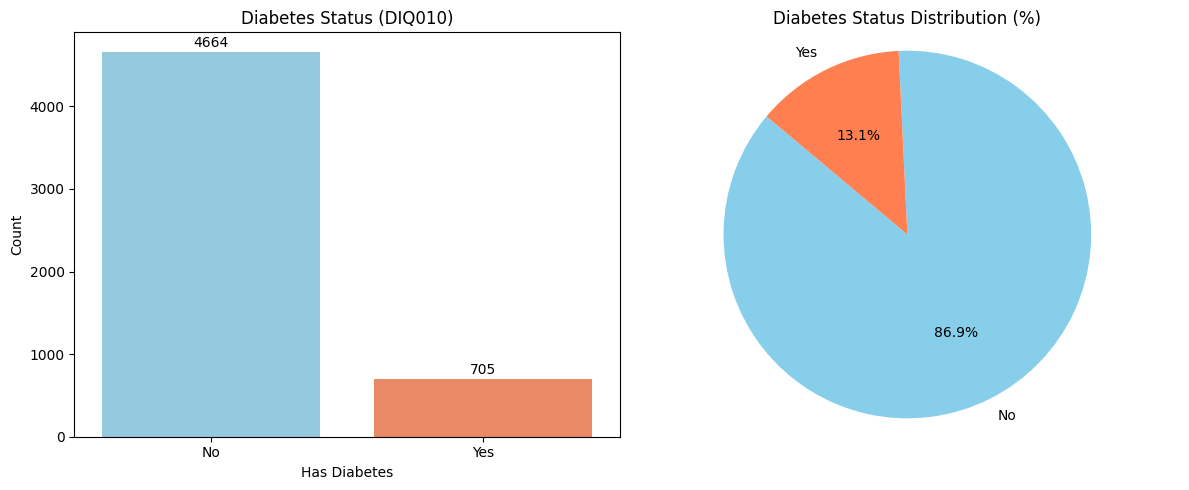

In [48]:
# Get counts
counts = df_AfterCorrelation['DIQ010'].value_counts()
labels = ['No', 'Yes']
colors = ['skyblue', 'coral']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Bar Plot ---
sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=axes[0])
axes[0].set_title('Diabetes Status (DIQ010)')
axes[0].set_xlabel('Has Diabetes')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels)

# Annotate bar values
for i, count in enumerate(counts.values):
    axes[0].text(i, count + 50, str(count), ha='center')

# --- Pie Chart ---
axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Diabetes Status Distribution (%)')
axes[1].axis('equal')  # Ensures pie is circular

plt.tight_layout()
plt.show()


Approximately 13.1% positive (true) and 86.9% negative (false).
Data suffers from severe Class Imbalance — accuracy alone will be misleading.

## Solutions:
- Precision, Recall, F1-score, and ROC-AUC for evaluation.
- Oversampling the minority class (e.g., SMOTE).
- Undersampling the majority class.
- Class weights in models (like class_weight='balanced' in sklearn models).

## Oversample
SMOTE is a resampling technique used to handle imbalanced datasets, where one class (usually the "positive" class) is significantly underrepresented.

Instead of just duplicating existing minority class examples, SMOTE creates synthetic examples that are similar but not identical to existing ones.

### How SMOTE Works
- Choose a minority class sample at random.
- Find its k nearest neighbors (usually k=5) in the feature space.
- Randomly select one of those neighbors.
- Generate a new sample along the line between the original and the neighbor.

In [49]:
friendly_column_map = {
    'SEQN': 'RespondentSequenceNumber',
    'ALQ121': 'AlcoholConsumptionFrequencyPast12Months',
    'ALQ151': 'HadAtLeast12DrinksInLifetime',
    'BAQ321A': 'FeltNervousPast30Days',
    'BAQ321B': 'FeltHopelessPast30Days',
    'BAQ321C': 'FeltRestlessPast30Days',
    'BAQ321D': 'FeltDepressedPast30Days',
    'BAQ530': 'MentalHealthProfessionalVisitPast12Months',
    'BAQ110': 'HadMentalHealthCondition',
    'BAQ132': 'TookMedicationForMentalHealth',
    'BAQ140': 'ReceivedTherapyForMentalHealth',
    'BMXWT': 'WeightKg',
    'BMXBMI': 'BodyMassIndex',
    'BMXLEG': 'UpperLegLengthCm',
    'BMXARML': 'UpperArmLengthCm',
    'BMXARMC': 'ArmCircumferenceCm',
    'BMXWAIST': 'WaistCircumferenceCm',
    'BMXHIP': 'HipCircumferenceCm',
    'BPQ020': 'EverDiagnosedWithHypertension',
    'BPQ080': 'CurrentlyTakingHypertensionMedication',
    'BPQ101D': 'HighBloodPressureAffectingDailyActivities',
    'BPXOSY1': 'SystolicBloodPressureReading1',
    'BPXODI1': 'DiastolicBloodPressureReading1',
    'BPXOSY2': 'SystolicBloodPressureReading2',
    'BPXODI2': 'DiastolicBloodPressureReading2',
    'BPXOSY3': 'SystolicBloodPressureReading3',
    'BPXODI3': 'DiastolicBloodPressureReading3',
    'BPXOPLS1': 'PulseRateReading1',
    'BPXOPLS2': 'PulseRateReading2',
    'BPXOPLS3': 'PulseRateReading3',
    'LBXWBCSI': 'WhiteBloodCellCount',
    'LBDLYMNO': 'LymphocyteNumber',
    'LBDMONO': 'MonocyteNumber',
    'LBDNENO': 'NeutrophilNumber',
    'LBXHGB': 'HemoglobinConcentration',
    'LBXMCVSI': 'MeanCorpuscularVolume',
    'LBXRDW': 'RedCellDistributionWidth',
    'LBXPLTSI': 'PlateletCount',
    'LBXMPSI': 'MeanPlateletVolume',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'AgeInYears',
    'RIDRETH3': 'RaceEthnicity',
    'DMDBORN4': 'CountryOfBirth',
    'DIQ010': 'DiagnosedWithDiabetes',
    'DIQ160': 'DiagnosedWithPrediabetes',
    'WTDRD1': 'DietaryInterviewWeight',
    'LBDRFOSI': 'SerumFolate',
    'LBDFOTSI': 'SerumFolateTotal',
    'LBXSF1SI': 'SerumFolate1',
    'LBXSF4SI': 'SerumFolate4',
    'LBXSF5SI': 'SerumFolate5',
    'LBXSF6SI': 'SerumFolate6',
    'LBXGH': 'SerumGlucose',
    'LBDHDDSI': 'HighDensityLipoprotein',
    'LBXHSCRP': 'HighSensitivityCRP',
    'HSQ590': 'SelfReportedHealthStatus',
    'LBDIHGSI': 'Glycohemoglobin',
    'LBDBGMSI': 'BloodGlucoseMeasurement',
    'LUAXSTAT': 'LungFunctionStatus',
    'LUXSMED': 'LungFunctionMeasurement1',
    'LUXSIQR': 'LungFunctionMeasurement2',
    'LUXCAPM': 'LungFunctionCapacity',
    'LUXCPIQR': 'LungFunctionCapacityIndex',
    'OHQ845': 'OralHealthQuestion845',
    'OHQ620': 'OralHealthQuestion620',
    'LBDBPBSI': 'BloodLeadLevel',
    'LBDBCDSI': 'BloodCadmiumLevel',
    'LBDTHGSI': 'BloodMercuryLevel',
    'LBDBMNSI': 'BloodManganeseLevel',
    'SLD012': 'SleepDuration',
    'SMQ020': 'SmokedAtLeast100Cigarettes',
    'LBDTCSI': 'SerumTotalCholesterol',
    'LBXVD2MS': 'VitaminD2Level',
    'LBXVE3MS': 'VitaminE3Level'

}

df_Analysis = df_AfterCorrelation.rename(columns=friendly_column_map)


In [50]:
print(df_Analysis.columns.tolist())

['RespondentSequenceNumber', 'AlcoholConsumptionFrequencyPast12Months', 'FeltNervousPast30Days', 'FeltHopelessPast30Days', 'FeltRestlessPast30Days', 'FeltDepressedPast30Days', 'MentalHealthProfessionalVisitPast12Months', 'HadMentalHealthCondition', 'ReceivedTherapyForMentalHealth', 'WeightKg', 'BodyMassIndex', 'UpperLegLengthCm', 'UpperArmLengthCm', 'ArmCircumferenceCm', 'WaistCircumferenceCm', 'HipCircumferenceCm', 'EverDiagnosedWithHypertension', 'CurrentlyTakingHypertensionMedication', 'HighBloodPressureAffectingDailyActivities', 'SystolicBloodPressureReading1', 'SystolicBloodPressureReading2', 'SystolicBloodPressureReading3', 'PulseRateReading1', 'PulseRateReading2', 'PulseRateReading3', 'WhiteBloodCellCount', 'LymphocyteNumber', 'MonocyteNumber', 'NeutrophilNumber', 'MeanCorpuscularVolume', 'RedCellDistributionWidth', 'AgeInYears', 'RaceEthnicity', 'DiagnosedWithDiabetes', 'DiagnosedWithPrediabetes', 'DietaryInterviewWeight', 'SerumFolate', 'SerumFolate4', 'SerumFolate6', 'SerumGl

In [51]:
# Separate numerical and boolean columns (excluding the target)
numerical_cols = df_Analysis.select_dtypes(include=['float64', 'int64']).columns.drop(['RespondentSequenceNumber'])
boolean_cols = df_Analysis.select_dtypes(include=['boolean']).columns.drop('DiagnosedWithDiabetes')

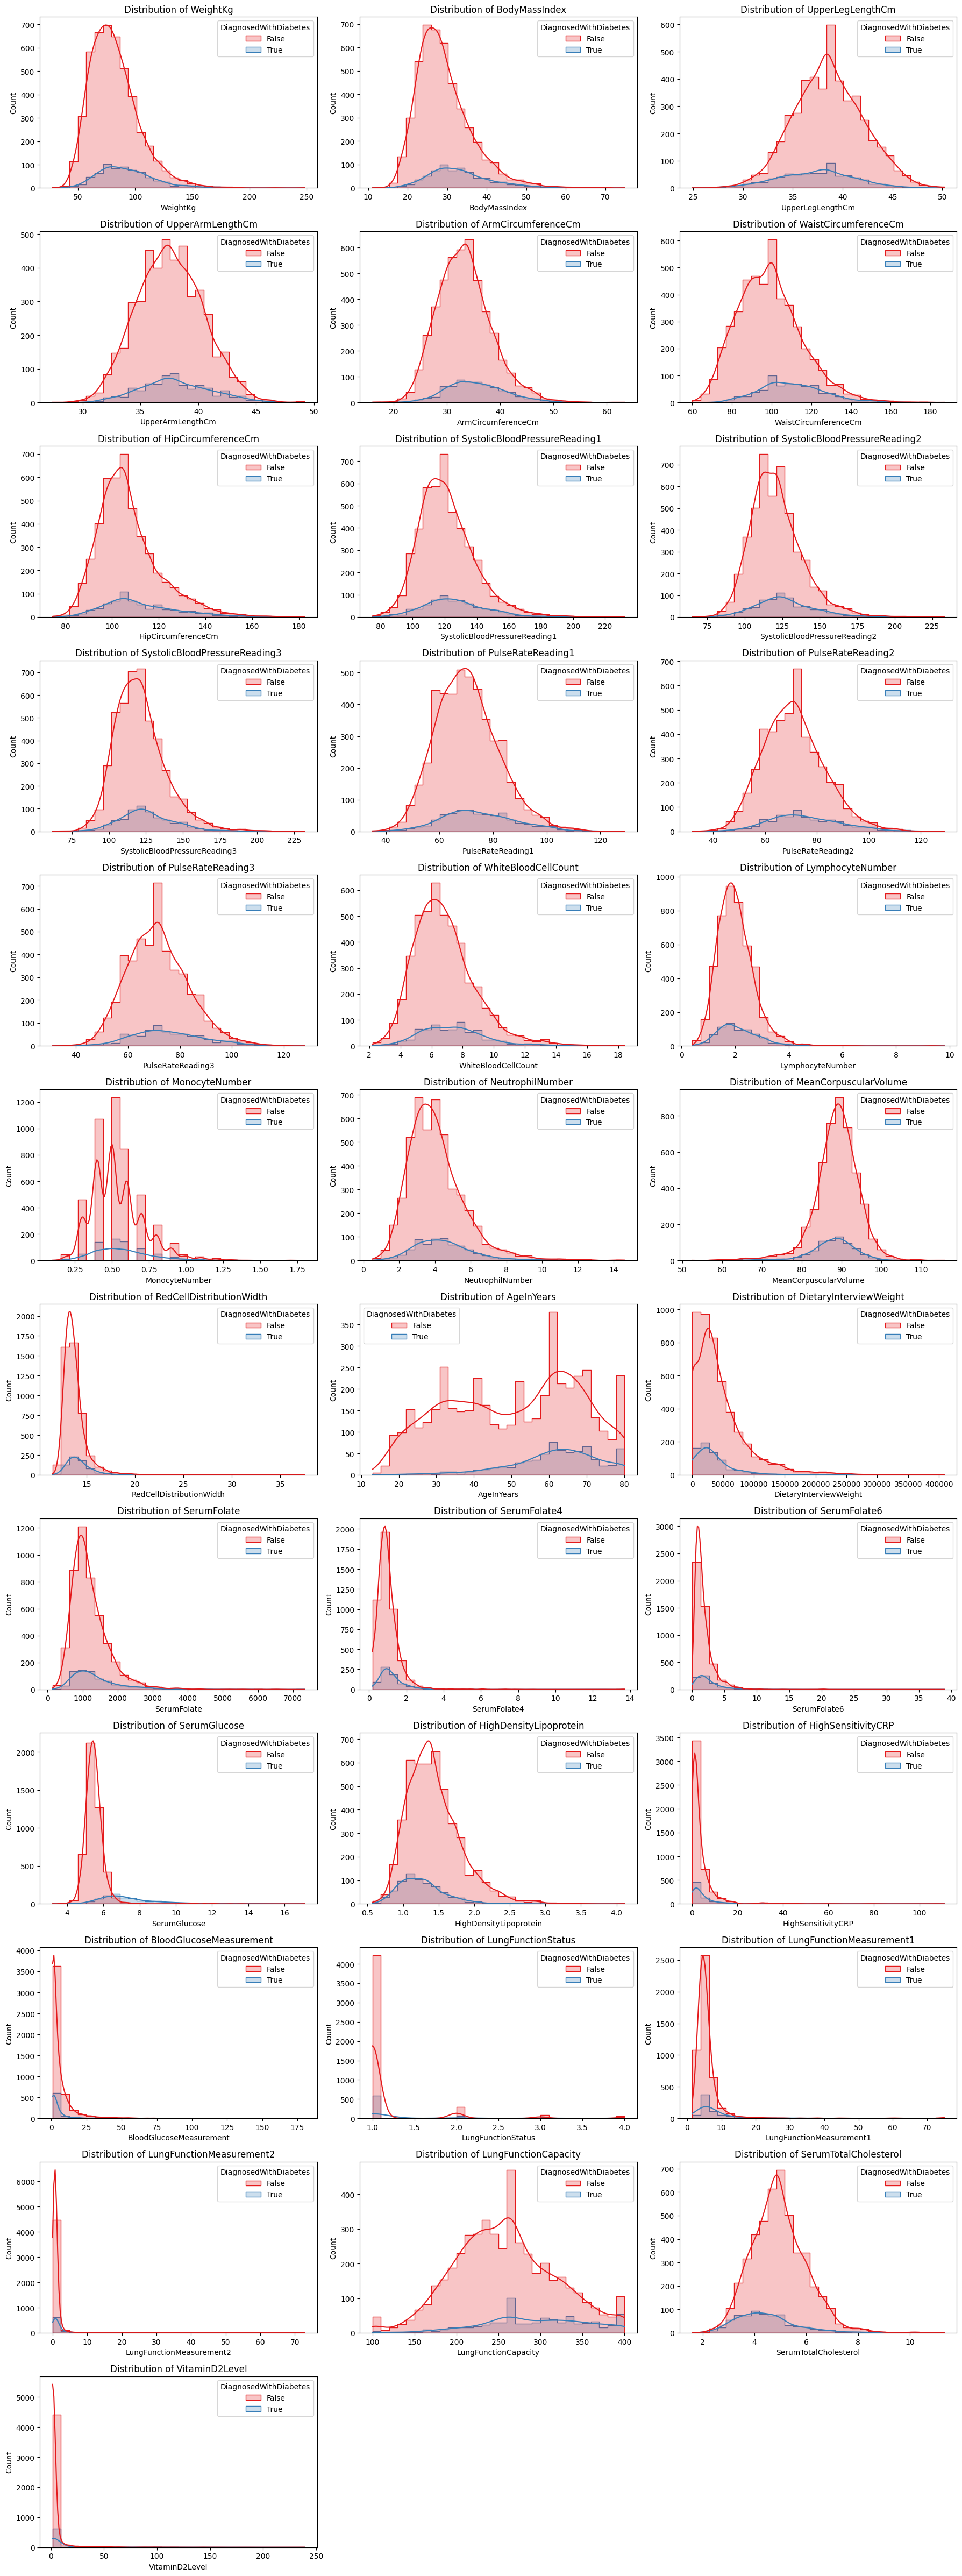

In [52]:
# Plot histograms for numerical features grouped by the target
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=df_Analysis, x=col, hue='DiagnosedWithDiabetes', kde=True, bins=30, palette='Set1', element='step')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

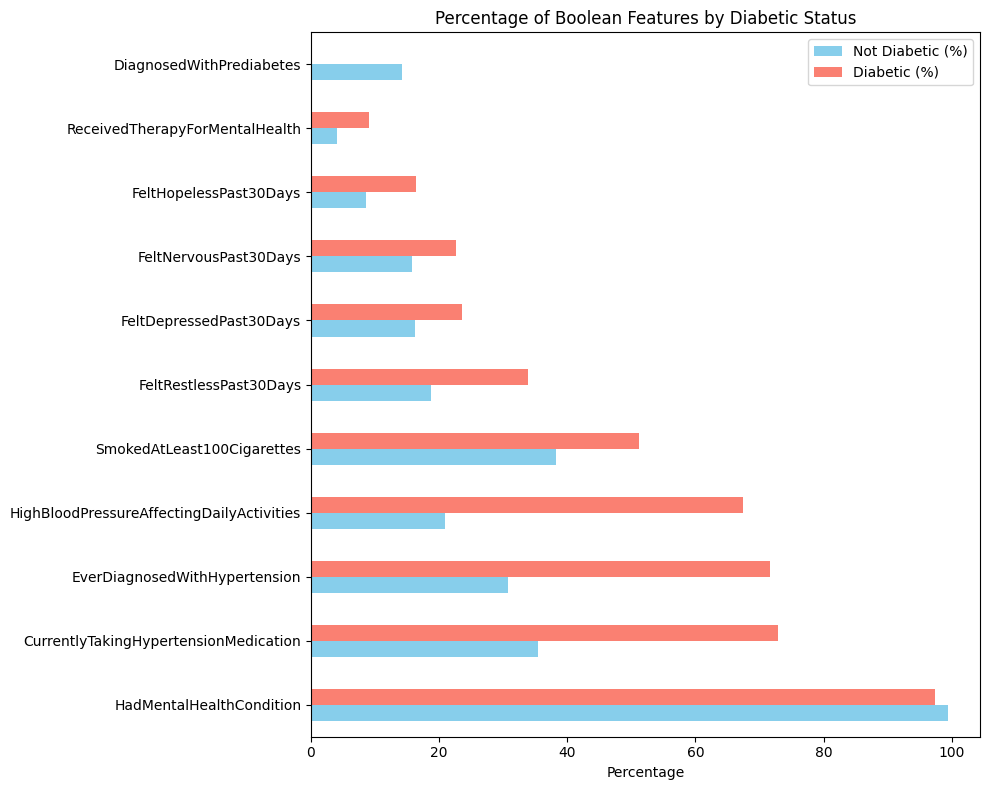

In [53]:
# Boolean feature analysis - percentage of True in each group of DIQ010
bool_summary = {}

for col in boolean_cols:
    counts = df_Analysis.groupby('DiagnosedWithDiabetes')[col].mean() * 100  # percentage of True
    bool_summary[col] = counts

bool_df = pd.DataFrame(bool_summary).T
bool_df.columns = ['Not Diabetic (%)', 'Diabetic (%)']

# Plot boolean feature differences
bool_df.sort_values('Diabetic (%)', ascending=False, inplace=True)
bool_df.plot(kind='barh', figsize=(10, 8), color=['skyblue', 'salmon'])
plt.title('Percentage of Boolean Features by Diabetic Status')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:

# Oversampling
X = df_Analysis.drop(columns=['DiagnosedWithDiabetes'])  # Replace 'DiagnosedWithDiabetes' with your target column
original_dtypes = X.dtypes
data_columns = X.columns.tolist()
X = X.values

y = df_Analysis['DiagnosedWithDiabetes']
y = y.values

# Apply SMOTE for upsampling the minority class in the entire dataset (for analysis, not training)
smote = SMOTE(random_state=42,) 
# Apply SMOTE to the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine majority and upsampled minority
X_resampled_df = pd.DataFrame(X_resampled, columns=data_columns)

for col in data_columns:
    if original_dtypes[col] == "boolean":
        X_resampled_df[col] = X_resampled_df[col].astype("int")
        X_resampled_df[col] = X_resampled_df[col].astype("boolean")
    else :
        X_resampled_df[col] = X_resampled_df[col].astype(original_dtypes[col])

y_resampled_df = pd.Series(y_resampled, name='DiagnosedWithDiabetes')
y_resampled_df = y_resampled_df.astype("int")
y_resampled_df = y_resampled_df.astype("boolean")

# Combine
df_balanced = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [56]:
print(df_balanced.dtypes.unique())

[dtype('float64')
 CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0], ordered=True, categories_dtype=int64)
 BooleanDtype
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ordered=True, categories_dtype=float64)
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 6.0, 7.0], ordered=False, categories_dtype=float64)
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=True, categories_dtype=float64)]


In [57]:
print(df_balanced['DiagnosedWithDiabetes'].value_counts(dropna=False))

DiagnosedWithDiabetes
False    4664
True     4664
Name: count, dtype: Int64


In [58]:
balanced_data_csv_path = os.path.join(current_working_dir, "DataSet/CSV/balanced.csv")
balanced_data_excel_path = os.path.join(current_working_dir, "DataSet/Excel/balanced.xlsx")

if not os.path.exists(balanced_data_csv_path):
    df_balanced.to_csv(balanced_data_csv_path)
    print(f"Balanced Data Saved to {balanced_data_csv_path}")

if not os.path.exists(balanced_data_excel_path):
    df_balanced.to_excel(balanced_data_excel_path)
    print(f"Balanced Data Saved to {balanced_data_excel_path}")


Balanced Data Saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\DataSet/CSV/balanced.csv
Balanced Data Saved to c:\Users\EngAbdalhameed\Desktop\HealthCare\DEPIGradProject\DataSet/Excel/balanced.xlsx


In [59]:
print(df_balanced.info())
print(df_balanced.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   RespondentSequenceNumber                   9328 non-null   float64 
 1   AlcoholConsumptionFrequencyPast12Months    6276 non-null   category
 2   FeltNervousPast30Days                      9328 non-null   boolean 
 3   FeltHopelessPast30Days                     9328 non-null   boolean 
 4   FeltRestlessPast30Days                     9328 non-null   boolean 
 5   FeltDepressedPast30Days                    9328 non-null   boolean 
 6   MentalHealthProfessionalVisitPast12Months  6706 non-null   category
 7   HadMentalHealthCondition                   9328 non-null   boolean 
 8   ReceivedTherapyForMentalHealth             9328 non-null   boolean 
 9   WeightKg                                   9328 non-null   float64 
 10  BodyMassInde

In [60]:
# Separate numerical and boolean columns (excluding the target)
numerical_cols = df_balanced.select_dtypes(include=['float64', 'int64']).columns.drop(['RespondentSequenceNumber'])
boolean_cols = df_balanced.select_dtypes(include=['boolean']).columns.drop('DiagnosedWithDiabetes')
categorical_cols = df_balanced.select_dtypes(include=['category']).columns

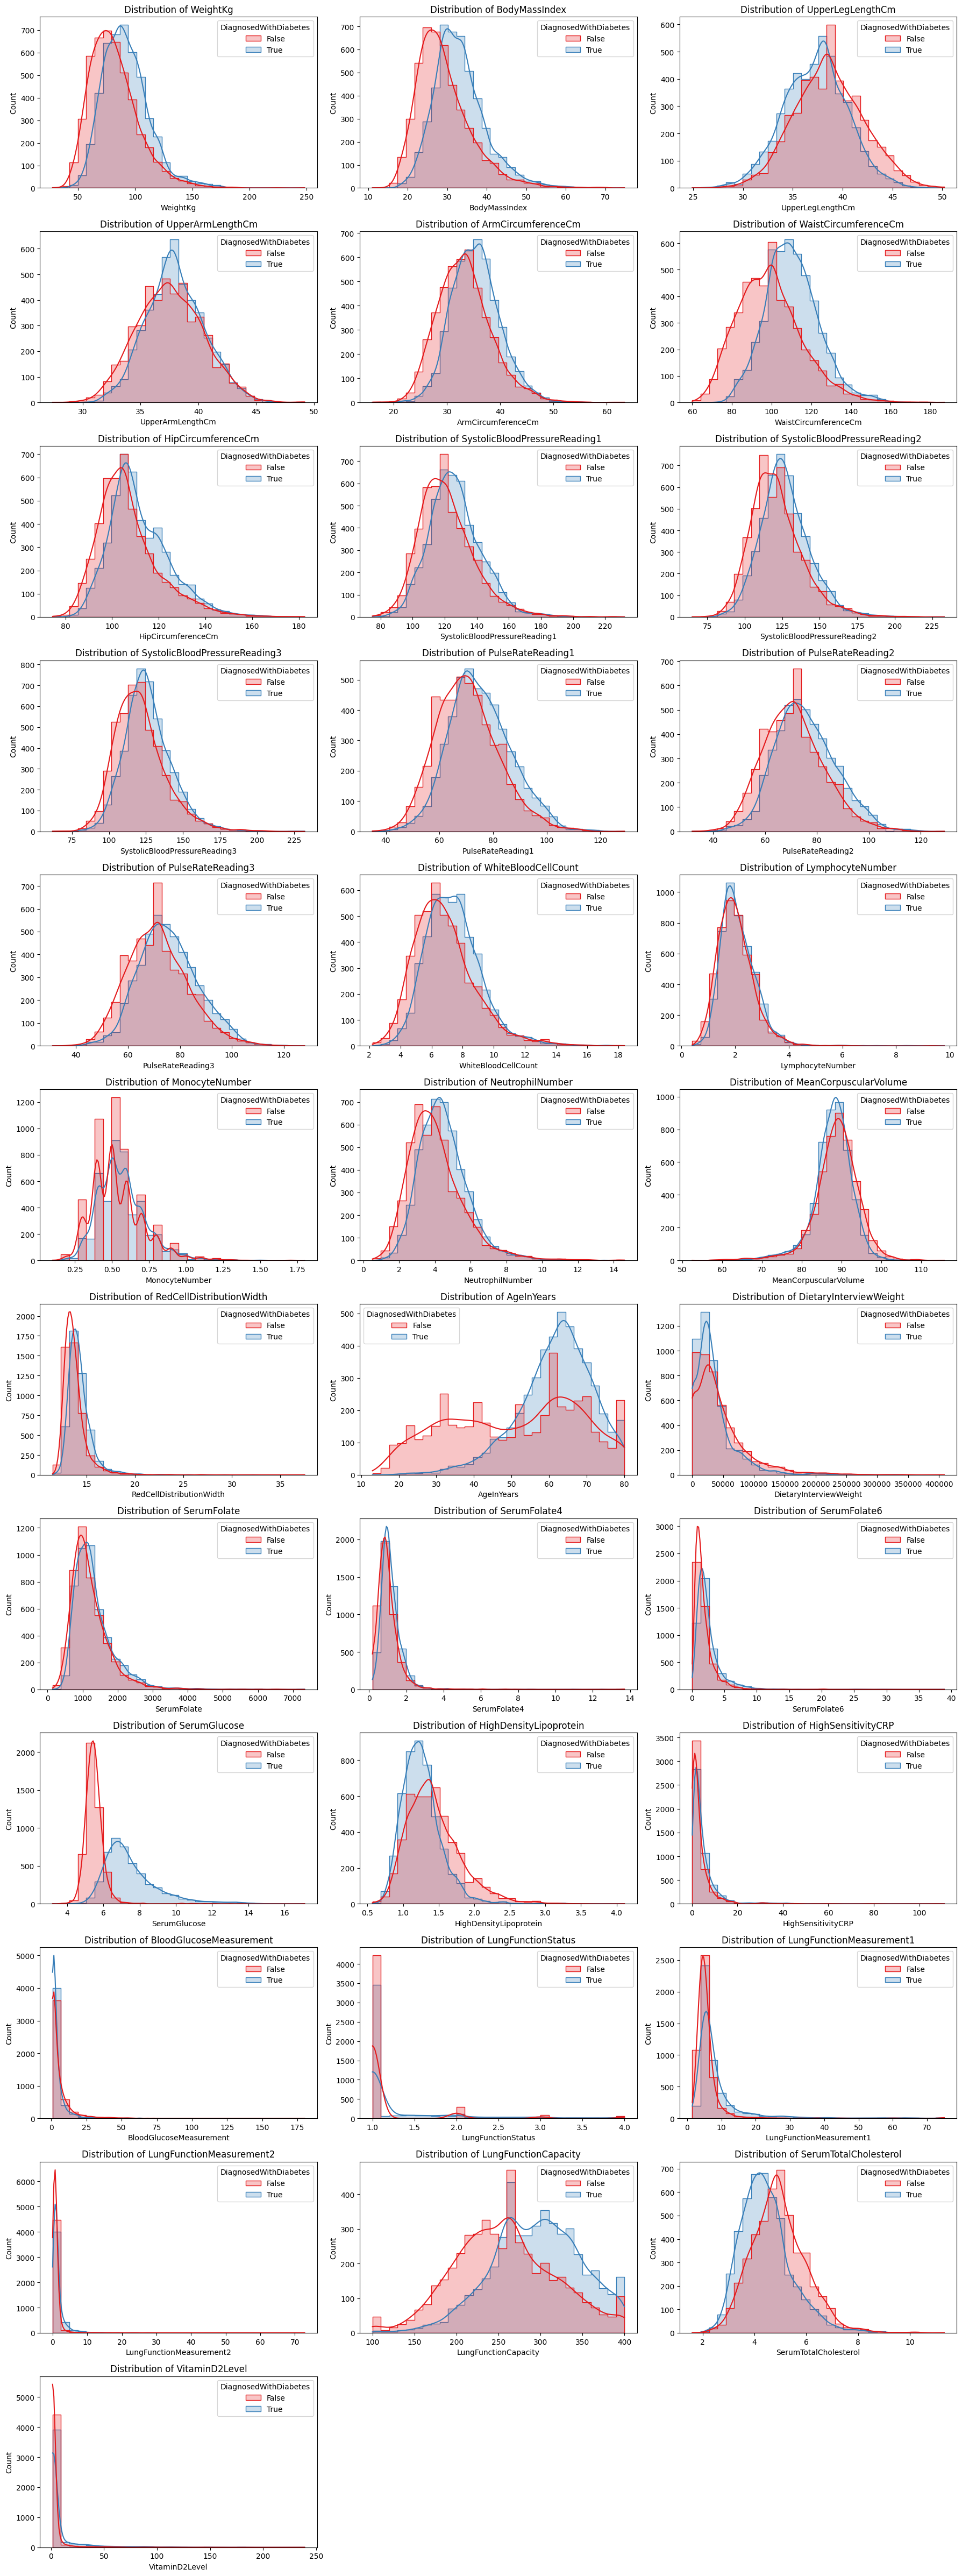

In [61]:

# Plot histograms for numerical features grouped by the target
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=df_balanced, x=col, hue='DiagnosedWithDiabetes', kde=True, bins=30, palette='Set1', element='step')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


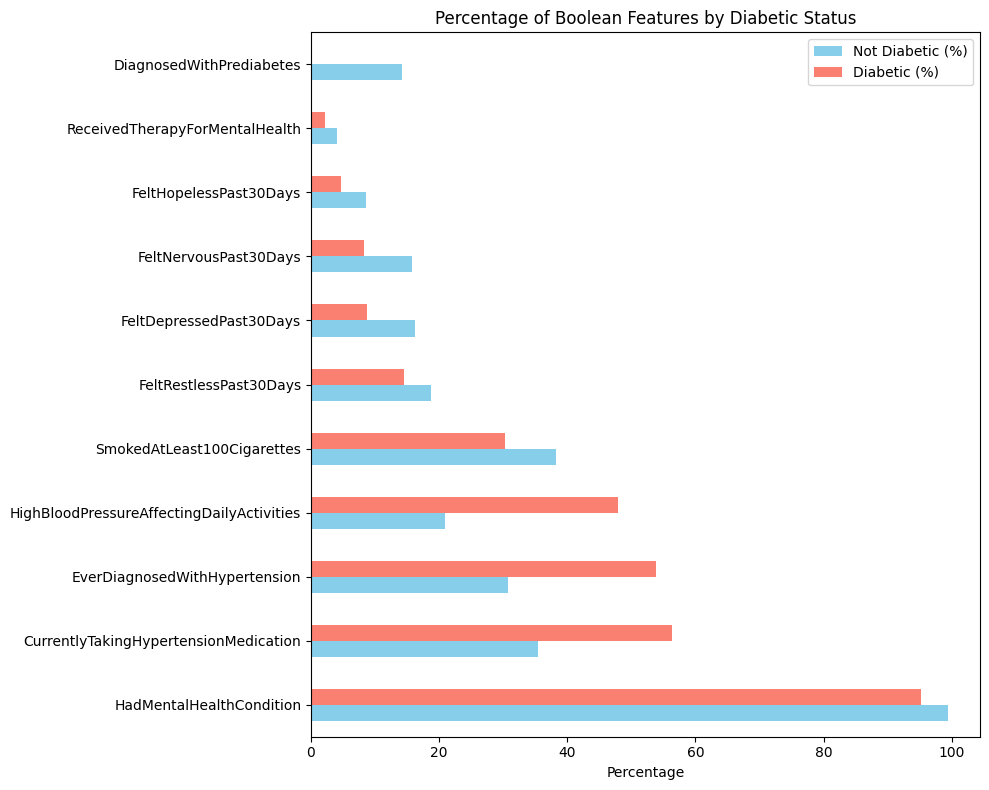

In [62]:
# Boolean feature analysis - percentage of True in each group of DIQ010
bool_summary = {}

for col in boolean_cols:
    counts = df_balanced.groupby('DiagnosedWithDiabetes')[col].mean() * 100  # percentage of True
    bool_summary[col] = counts

bool_df = pd.DataFrame(bool_summary).T
bool_df.columns = ['Not Diabetic (%)', 'Diabetic (%)']

# Plot boolean feature differences
bool_df.sort_values('Diabetic (%)', ascending=False, inplace=True)
bool_df.plot(kind='barh', figsize=(10, 8), color=['skyblue', 'salmon'])
plt.title('Percentage of Boolean Features by Diabetic Status')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

# Model Training

**=============MACHINE LEARNING PART USING RANDOM FOREST=============**

# Random Forest

In [63]:
from Training.RandomForest import RandomForestTrainer

In [64]:
# Initialize the model and split training and test data
random_forest_model = RandomForestTrainer(df_AfterCorrelation, 'DIQ010', oversample=True)
print("\nData Shapes:")
print(f"xTrain: {random_forest_model.xTrain.shape}")
print(f"yTrain: {random_forest_model.yTrain.shape}")
print(f"xTest:  {random_forest_model.xTest.shape}")
print(f"yTest:  {random_forest_model.yTest.shape}")


Data Shapes:
xTrain: (7462, 51)
yTrain: (7462,)
xTest:  (1866, 51)
yTest:  (1866,)


In [65]:
random_forest_model.train()
print("Training Complete")

Training Complete


In [66]:
results = random_forest_model.evaluate() 
# Print results
print("Confusion Matrix:")
print(results["confusion_matrix"])
print("\nAccuracy:", results["accuracy"])
print("\nClassification Report:")
print(results["classification_report"])
        

Confusion Matrix:
[[879  54]
 [ 41 892]]

Accuracy: 0.9490889603429796

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95       933
        True       0.94      0.96      0.95       933

    accuracy                           0.95      1866
   macro avg       0.95      0.95      0.95      1866
weighted avg       0.95      0.95      0.95      1866



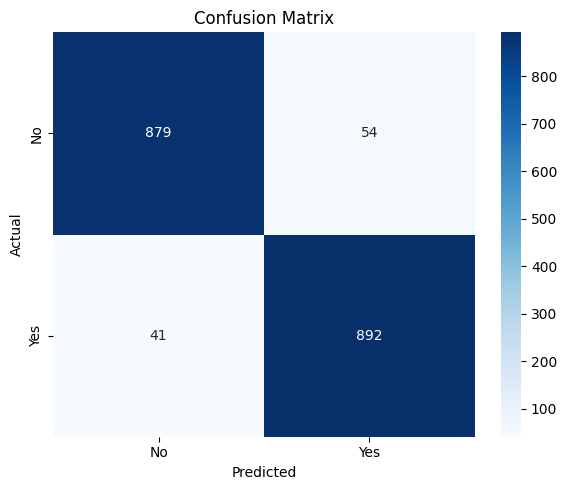

In [67]:
plt.figure(figsize=(6, 5))
sns.heatmap(results["confusion_matrix"], annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()